# Slice interpolation for labels in zarpaint

## Resources

* Paper:  Raya and Udupa "Shape-Based Interpolation of Multidimensional Objects" IEEE TRANSACTIONS ON MEDICAL IMAGING, VOL. 9, NO. I , MARCH 1990
* [This StackOverflow post](https://stackoverflow.com/questions/48818373/interpolate-between-two-images) (not well executed for nd, but useful to read anyway)


## Set up some example data

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
import napari

In [3]:
viewer = napari.Viewer()
# viewer.open_sample('napari', 'cells3d')
# membrane_layer = viewer.layers[0]
# nuclei_layer = viewer.layers[1]

In [4]:
from skimage import data
blobs = np.stack(
    [
        data.binary_blobs(
            length=128, blob_size_fraction=0.05, n_dim=3, volume_fraction=f, seed=0
        )
        for f in np.linspace(0.05, 0.5, 10)
    ],
    axis=0,
)
viewer.add_image(blobs)

# # numpy label data
# single_nuclei_label = tifffile.imread('single-nuclei-label.tif')
# viewer.add_labels(single_nuclei_label)
# label_layer = viewer.layers[-1]
# labels = label_layer.data

<Image layer 'blobs' at 0x105ffddf0>

Traceback (most recent call last):
  File "/Users/genevieb/mambaforge/envs/zarpaint/lib/python3.9/site-packages/magicgui/widgets/_bases/value_widget.py", line 57, in _on_value_change
    self.changed.emit(value)
  File "psygnal/_signal.py", line 682, in psygnal._signal.SignalInstance.emit
  File "psygnal/_signal.py", line 724, in psygnal._signal.SignalInstance._run_emit_loop
  File "psygnal/_signal.py", line 725, in psygnal._signal.SignalInstance._run_emit_loop
  File "psygnal/_signal.py", line 745, in psygnal._signal.SignalInstance._run_emit_loop
  File "/Users/genevieb/mambaforge/envs/zarpaint/lib/python3.9/site-packages/toolz/functoolz.py", line 306, in __call__
    return self._partial(*args, **kwargs)
  File "/Users/genevieb/mambaforge/envs/zarpaint/lib/python3.9/site-packages/zarpaint/_zarpaint.py", line 20, in _set_default_labels_path
    source_image = source_image_event.value
AttributeError: 'Image' object has no attribute 'value'


## Manually create labels with zarpaint GUI

1. Plugins > zarpaint > create labels
2. Create a new zarr file called "mylabels.zarr"
3. Click "Run" in the zarpaint widget
4. Label the same nucleus at two different slices (take note of which slice numbers)

In [5]:
# Make note of which image slices you labelled
slice_index_1 = 60
slice_index_2 = 70
interp_dim = 1

## Exploring the tensorstore labels

In [6]:
# after you have done the manual steps above, run this cell
label_layer = viewer.layers[-1]
ts = label_layer.data  # tensorstore data for the labels
print(ts)

TensorStore({
  'context': {
    'cache_pool': {},
    'data_copy_concurrency': {},
    'file_io_concurrency': {},
  },
  'driver': 'zarr',
  'dtype': 'uint32',
  'kvstore': {'driver': 'file', 'path': 'blobls-test.zarr/'},
  'metadata': {
    'chunks': [1, 1, 128, 128],
    'compressor': {
      'blocksize': 0,
      'clevel': 5,
      'cname': 'lz4',
      'id': 'blosc',
      'shuffle': 1,
    },
    'dimension_separator': '.',
    'dtype': '<u4',
    'fill_value': 0,
    'filters': None,
    'order': 'C',
    'shape': [10, 128, 128, 128],
    'zarr_format': 2,
  },
  'transform': {
    'input_exclusive_max': [[10], [128], [128], [128]],
    'input_inclusive_min': [0, 0, 0, 0],
  },
})


In [8]:
image_1 = np.take(label_layer.data, slice_index_1, axis=interp_dim)
image_2 = np.take(label_layer.data, slice_index_2, axis=interp_dim)

In [9]:
print(image_1)
print("")
print("numpy array values:\n")
print(np.asarray(image_1))


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]

numpy array values:

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 .

In [10]:
print(np.sum(image_1))
print(np.sum(image_2))


2772
3030


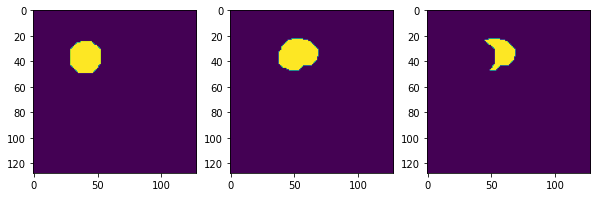

In [11]:
diff = image_1 - image_2

fig, ax = plt.subplots(ncols=3, figsize=(10,3))
ax[0].imshow(image_1[viewer.dims.current_step[0]])  # 4D original dataset
ax[1].imshow(image_2[viewer.dims.current_step[0]])  # 4D original dataset
ax[2].imshow(diff[viewer.dims.current_step[0]])     # 4D original dataset


## Functions

In [12]:
# These functions are only used for this notebook, not for zarpaint
# It's convenient to have an easy way to delete label scribbling

def erase_slices(label_layer, slice_index_1, slice_index_2, interp_dim=0):
    """Erase label data on slices between slice_index_1 (inclusive),
    and slice_index_2 (non-inclusive, same as the python slicing syntax)."""
    for slice_number in range(slice_index_1, slice_index_2):
        slices = [slice(None) for _ in label_layer.data.shape]
        slices[interp_dim] = slice_number
        label_layer.data[slices] = 0
    label_layer.refresh()

    
def erase_all_slices(label_layer):
    for i in label_layer.data.shape[0]:
        label_layer.data[i, ...] = 0
    label_layer.refresh()  # refresh current view

These functions are for zarpaint...

In [13]:
import numpy as np
from scipy.interpolate import interpn
from scipy.ndimage import distance_transform_edt


def distance_transform(image):
    """Distance transform for a boolean image.
    
    Returns positive values inside the object,
    and negative values outside.
    """
    image = image.astype(bool)
    edt = distance_transform_edt(image) - distance_transform_edt(~image)
    return edt


def point_and_values(image_1, image_2, interp_dim=0):
    edt_1 = distance_transform(image_1)
    edt_2 = distance_transform(image_2)
    values = np.stack([edt_1, edt_2], axis=interp_dim)
    points = tuple([np.arange(i) for i in values.shape])
    return points, values


def xi_coords(shape, percent=0.5):
    slices = [slice(0, i) for i in shape]
    xi = np.moveaxis(np.mgrid[slices], 0, -1).reshape(np.prod(shape), len(shape)).astype('float')
    xi = np.insert(xi, interp_dim, percent, axis=1)
    return xi


def slice_iterator(slice_index_1, slice_index_2):
    intermediate_slices = np.arange(slice_index_1 + 1, slice_index_2)
    n_slices = slice_index_2 - slice_index_1 + 1  # inclusive
    stepsize = 1 / n_slices
    intermediate_percentages = np.arange(0 + stepsize, 1, stepsize)
    return zip(intermediate_slices, intermediate_percentages)


def interpolated_slice(percent, points, values, interp_dim=0, method='linear'):
    # Find the original image shape
    img_shape = list(values.shape)
    del img_shape[interp_dim]
    # Calculate the interpolated slice
    xi = xi_coords(img_shape, percent=percent)
    interpolated_img = interpn(points, values, xi, method=method)
    interpolated_img = np.reshape(interpolated_img, img_shape) > 0
    return interpolated_img
    

In [ ]:




# ## First draft, simply returns a numpy stack of the interpolated slices

# def interpolate_between_slices(image_1, image_2, slice_index_1, slice_index_2, interp_dim=0, method='linear'):
#     if slice_index_1 > slice_index_2:
#         image_1, image_2 = image_2, image_1
#         slice_index_1, slice_index_2 = slice_index_2, slice_index_1
#     ####
#     # possible extension, handle all label ids separately
#     label_id = 1
#     image_1 = image_1.astype(bool)
#     image_2 = image_2.astype(bool)
#     ####
#     edt_1 = distance_transform(image_1)
#     edt_2 = distance_transform(image_2)
#     values = np.stack([edt_1, edt_2], axis=interp_dim)
#     points = tuple([np.arange(i) for i in values.shape])

#     output = []
#     for slice_number, percentage in slice_iterator(slice_index_1, slice_index_2):
#         interpolated_img = interpolated_slice(percentage, points, values, interp_dim=interp_dim, method='linear')
#         output.append(interpolated_img)
#     output = np.array(output)
#     return output


# result = interpolate_between_slices(image_1, image_2, slice_index_1, slice_index_2)
# print(result.shape)

In [14]:
## Second draft, writes directly into tensorstore zarr array

def interpolate_between_slices(label_layer, image_1, image_2, slice_index_1, slice_index_2, interp_dim=0, method='linear'):
    if slice_index_1 > slice_index_2:
        image_1, image_2 = image_2, image_1
        slice_index_1, slice_index_2 = slice_index_2, slice_index_1
    ####
    # possible extension, handle all label ids separately
    label_id = 1
    image_1 = image_1.astype(bool)
    image_2 = image_2.astype(bool)
    ####
    points, values = point_and_values(image_1, image_2, interp_dim=interp_dim)

    for slice_number, percentage in slice_iterator(slice_index_1, slice_index_2):
        interpolated_img = interpolated_slice(percentage, points, values, interp_dim=interp_dim, method='linear')
        indices = [slice(None) for _ in range(label_layer.data.ndim)]
        indices[interp_dim] = slice_number
        indices = tuple(indices)
        label_layer.data[indices][interpolated_img] = label_id
    label_layer.refresh()  # will update the current view

# interpolate_between_slices(label_layer, image_1, image_2, slice_index_1, slice_index_2)
# print("Done!")
# print("Please scroll through napari to see the interpolated label slices")


In [15]:
interp_dim = 1
interpolate_between_slices(label_layer, image_1, image_2, slice_index_1, slice_index_2, interp_dim=interp_dim)
print("Done!")
print("Please scroll through napari to see the interpolated label slices")


Done!
Please scroll through napari to see the interpolated label slices


In [ ]:
arr = np.random.random((512, 512, 512))
arr.shape

In [ ]:
label_layer.data[0, np.nonzero(interpolated_img)].shape

In [ ]:
viewer.dims.current_step

In [ ]:
indices

In [ ]:
label_layer.data[5, 62, slice(None), slice(None)][:100, :100] = 2
label_layer.refresh()

In [ ]:
label_layer.refresh()

In [ ]:
np.full?

In [ ]:
label_layer.data[indices] = 5

In [ ]:
indices = list(np.nonzero(interpolated_img))
indices.insert(interp_dim, np.full(len(indices[0]), slice_number))

print(indices)
print(len(indices))

In [ ]:
slices = tuple([slice(None) for _ in range(label_layer.data.ndim)])
print(slices)
label_layer.data.shape[slices]

In [ ]:
import tensorstore
tensorstore.__version__

In [ ]:
!conda list | grep tensorstore

In [ ]:
numpy.insert(interpolated_img, obj, values, axis=None)

In [ ]:
np.expand_dims?

In [ ]:
temp = np.expand_dims(interpolated_img, interp_dim)
temp.shape

In [ ]:
temp

In [ ]:
interp_dim = 1
interpolate_between_slices(label_layer, image_1, image_2, slice_index_1, slice_index_2, interp_dim=interp_dim)
print("Done!")
print("Please scroll through napari to see the interpolated label slices")

In [ ]:
%debug

In [ ]:
slices = [slice(None) for _ in range(label_layer.data.ndim)]
print(slices)
# label_layer.data[slices]

In [ ]:
np.take(label_layer.data, slice_number, axis=interp_dim).shape

In [ ]:

label_id = 1
image_1 = image_1.astype(bool)
image_2 = image_2.astype(bool)

points, values = point_and_values(image_1, image_2, interp_dim=interp_dim)


#for slice_number, percentage in slice_iterator(slice_index_1, slice_index_2):
#    interpolated_img = interpolated_slice(percentage, points, values, interp_dim=interp_dim, method='linear')
#    label_layer.data[slice_number, interpolated_img] = label_id
#label_layer.refresh()  # will update the current view

In [ ]:
percentage = 0.5
percent = percentage

img_shape = list(values.shape)
del img_shape[interp_dim]
# Calculate the interpolated slice

# xi = xi_coords(img_shape, percent=percent)
method='linear'
shape = img_shape
slices = [slice(0, i) for i in shape]
xi = np.moveaxis(np.mgrid[slices], 0, -1).reshape(np.prod(shape), len(shape)).astype('float')
xi = np.insert(xi, interp_dim, percent, axis=1)

interpolated_img = interpn(points, values, xi, method=method)
interpolated_img = np.reshape(interpolated_img, img_shape) > 0


In [ ]:
interpolated_img.shape

In [ ]:
slice_number = 50
temp = np.expand_dims(interpolated_img, interp_dim)
print(temp.shape)


In [ ]:
temp


In [ ]:
indices = np.argwhere(interpolated_img)
indices = np.insert(indices, interp_dim, slice_number, axis=1)


In [ ]:
xi

In [ ]:
import numpy as np
from scipy.interpolate import interpn
from scipy.ndimage import distance_transform_edt


def distance_transform(image):
    """Distance transform for a boolean image.
    
    Returns positive values inside the object,
    and negative values outside.
    """
    image = image.astype(bool)
    edt = distance_transform_edt(image) - distance_transform_edt(~image)
    return edt


def point_and_values(image_1, image_2, interp_dim=0):
    edt_1 = distance_transform(image_1)
    edt_2 = distance_transform(image_2)
    values = np.stack([edt_1, edt_2], axis=interp_dim)
    points = tuple([np.arange(i) for i in values.shape])
    return points, values


def xi_coords(shape, percent=0.5):
    slices = [slice(0, i) for i in shape]
    xi = np.moveaxis(np.mgrid[slices], 0, -1).reshape(np.prod(shape), len(shape))
    xi = xi = np.c_[np.full((np.prod(shape)), percent), xi]
    return xi


def slice_iterator(slice_index_1, slice_index_2):
    intermediate_slices = np.arange(slice_index_1 + 1, slice_index_2)
    n_slices = slice_index_2 - slice_index_1 + 1  # inclusive
    stepsize = 1 / n_slices
    intermediate_percentages = np.arange(0 + stepsize, 1, stepsize)
    return zip(intermediate_slices, intermediate_percentages)


def interpolated_slice(percent, points, values, interp_dim=0, method='linear'):
    # Find the original image shape
    img_shape = list(values.shape)
    del img_shape[interp_dim]
    # Calculate the interpolated slice
    xi = xi_coords(img_shape, percent=percent)
    interpolated_img = interpn(points, values, xi, method=method)
    interpolated_img = np.reshape(interpolated_img, img_shape) > 0
    return interpolated_img
    

## Sanity check

Check that an interpolation percentage of zero returns a result equal to the input image_1.
Check that an interpolation percentage of one returns a result equal to the input image_2.

In [ ]:
interp_dim = 0
label_id = 1

points, values = point_and_values(image_1, image_2)

output_1 = interpolated_slice(0.0, points, values, interp_dim=interp_dim)
output_2 = interpolated_slice(1.0, points, values, interp_dim=interp_dim)

assert np.allclose(image_1.astype(bool), interpolated_slice(0.0, points, values, interp_dim=interp_dim))
assert np.allclose(image_2.astype(bool), interpolated_slice(1.0, points, values, interp_dim=interp_dim))

## Test cases
* a simple 3D test case (interpolating 2D slices)
  * assert when percent = 0, the result exactly matches the input image_1
  * assert when percent = 1.0, the result exactly matches the input image_2
  * check results against a previous computation
* A test case with multiple label id values
* A 4D test case (interpolate across time points, from two labelled 3d blobs)
* Check code is robust as to which order image_2 and image_2 are given (eg: user can be scrolling forwards OR backwards through the slices)
* A test case when the structure is branching (one input blob turns into two output blobs)

## TODO

- [ ] Full docstrings for all functions
- [ ] Basic test cases
- [ ] Extend to multiple label id values
- [ ] Consider extending functionality so we only need bring a small cropped section of each slice into memory, instead of needing to convert the full slice to numpy
- [ ] 

In [ ]:
# answers
viewer.dims.not_displayed  # how to get the dimension that is a slider bar

In [ ]:
viewer.close()